In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
Airline = pd.read_excel("/content/Airlines+Data.xlsx")
Airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
Airline.Month.value_counts()

1995-01-01    1
1995-02-01    1
2000-11-01    1
2000-10-01    1
2000-09-01    1
             ..
1997-06-01    1
1997-05-01    1
1997-04-01    1
1997-03-01    1
2002-12-01    1
Name: Month, Length: 96, dtype: int64

In [6]:
Airline1 = Airline.copy()

1. ACF And PCAF  

In [7]:
Airline1 = Airline1.rename(columns={'Month' : 'Date'})

In [8]:
Airline1.head()

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [9]:
Airline1['Month'] = Airline1.Date.dt.strftime('%b')
Airline1['Year'] = Airline1.Date.dt.strftime('%Y')
Airline1.head()

,Date,Passengers,Month,Year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


<Axes: >

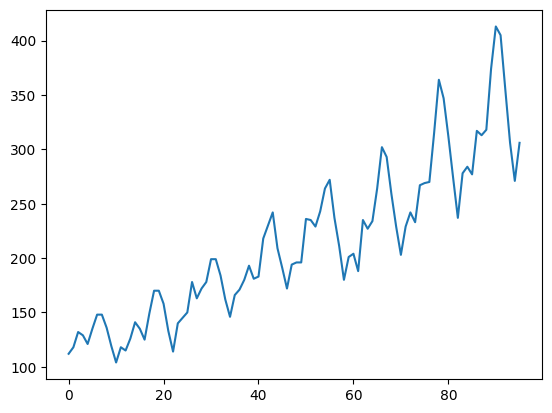

In [10]:
Airline1['Passengers'].plot()

<Axes: xlabel='Year', ylabel='Passengers'>

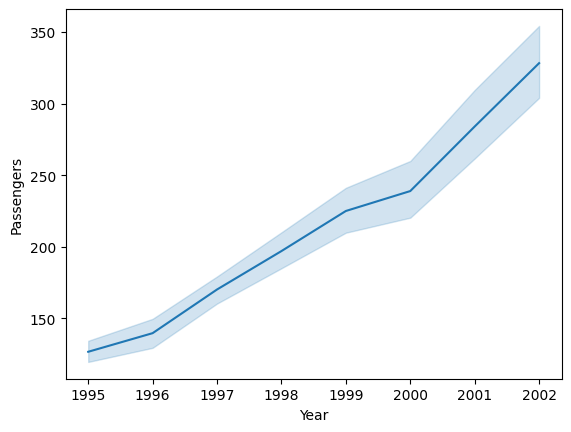

In [11]:
import seaborn as sns
sns.lineplot(x= 'Year', y= 'Passengers', data = Airline1)

<Axes: xlabel='Month', ylabel='Passengers'>

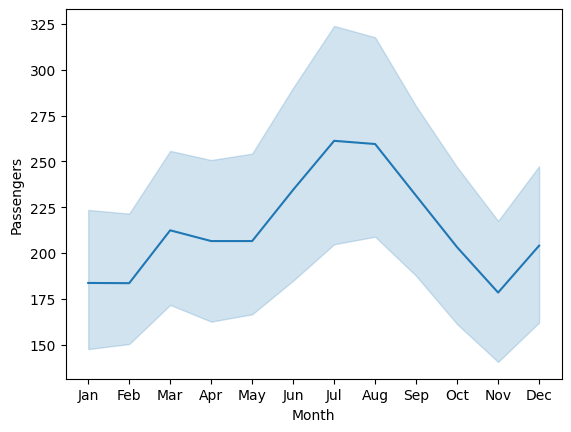

In [12]:
sns.lineplot(x= 'Month', y= 'Passengers', data = Airline1)

<Axes: >

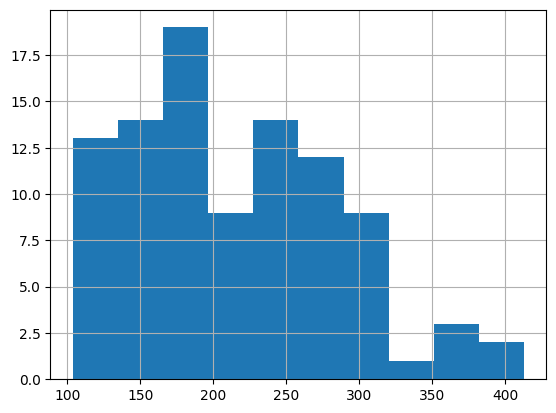

In [13]:
Airline1.Passengers.hist()

In [14]:
Airline1['Passengers_Diff'] = Airline1['Passengers'].diff(periods=1)

In [15]:
Airline1

,Date,Passengers,Month,Year,Passengers_Diff
0,1995-01-01,112,Jan,1995,NaN
1,1995-02-01,118,Feb,1995,6.0
2,1995-03-01,132,Mar,1995,14.0
3,1995-04-01,129,Apr,1995,-3.0
4,1995-05-01,121,May,1995,-8.0
...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,-8.0
92,2002-09-01,355,Sep,2002,-50.0
93,2002-10-01,306,Oct,2002,-49.0
94,2002-11-01,271,Nov,2002,-35.0


In [16]:
Airline0 = Airline1.dropna()

In [17]:
Airline0

,Date,Passengers,Month,Year,Passengers_Diff
1,1995-02-01,118,Feb,1995,6.0
2,1995-03-01,132,Mar,1995,14.0
3,1995-04-01,129,Apr,1995,-3.0
4,1995-05-01,121,May,1995,-8.0
5,1995-06-01,135,Jun,1995,14.0
...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,-8.0
92,2002-09-01,355,Sep,2002,-50.0
93,2002-10-01,306,Oct,2002,-49.0
94,2002-11-01,271,Nov,2002,-35.0


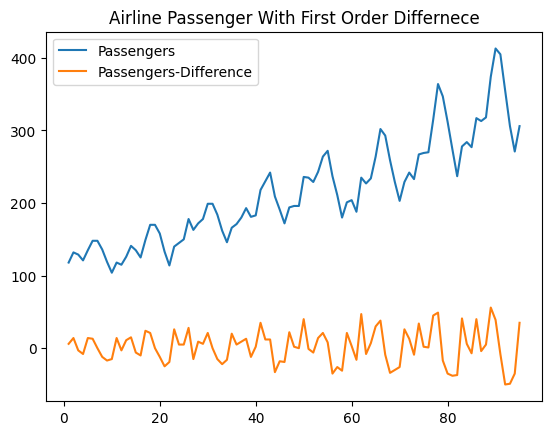

In [18]:
plt.title('Airline Passenger With First Order Differnece')
plt.plot(Airline0['Passengers'], label='Passengers')
plt.plot(Airline0['Passengers_Diff'], label='Passengers-Difference')
plt.legend()

In [19]:
# ACF values
acf_values = acf(Airline1['Passengers'])
np.round(acf_values,2)

array([1.  , 0.93, 0.84, 0.76, 0.69, 0.64, 0.6 , 0.56, 0.54, 0.56, 0.58,
       0.61, 0.63, 0.56, 0.48, 0.42, 0.36, 0.31, 0.27, 0.24])

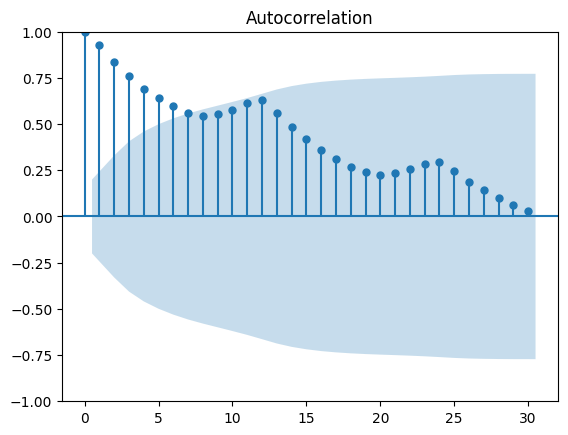

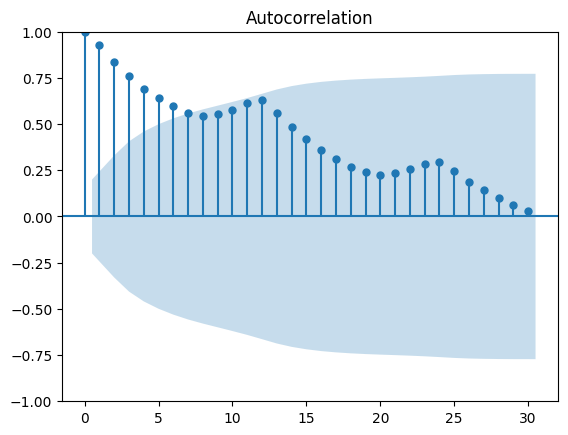

In [20]:
plot_acf(Airline1['Passengers'], lags=30)

In [21]:
# PACF values
pacf_values = pacf(Airline1['Passengers'])
np.round(pacf_values,2)

array([ 1.  ,  0.94, -0.2 ,  0.07, -0.  ,  0.12, -0.01,  0.02,  0.18,
        0.23,  0.08,  0.29, -0.16, -0.71, -0.02,  0.14, -0.03,  0.14,
        0.18,  0.24])

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


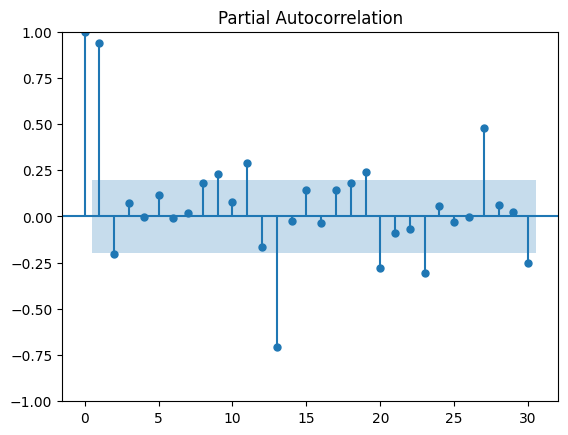

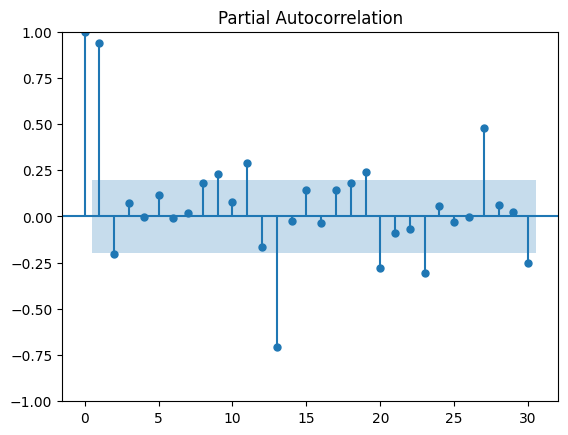

In [22]:
plot_pacf(Airline1['Passengers'], lags=30)

2. Model Based Methods

In [23]:
Airline2 = Airline1.copy()
Airline2=Airline2.drop('Passengers_Diff',axis=1)

In [24]:
Airline2['t'] = range(1, len(Airline2)+1)
Airline2['t_squared'] = Airline2['t']**2
Airline2['log_Passengers'] = np.log(Airline2['Passengers'])

In [25]:
Airline2.head()

,Date,Passengers,Month,Year,t,t_squared,log_Passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791


In [26]:
 dummy = pd.get_dummies(Airline2.Month)
 Airline2 = pd.concat([Airline2,dummy],axis=1)

In [27]:
Airline2

,Date,Passengers,Month,Year,t,t_squared,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
#data splitting


In [29]:
train = Airline2.head(71)
test = Airline2.head(25)

In [30]:
train

,Date,Passengers,Month,Year,t,t_squared,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2000-07-01,302,Jul,2000,67,4489,5.710427,0,0,0,0,0,1,0,0,0,0,0,0
67,2000-08-01,293,Aug,2000,68,4624,5.680173,0,1,0,0,0,0,0,0,0,0,0,0
68,2000-09-01,259,Sep,2000,69,4761,5.556828,0,0,0,0,0,0,0,0,0,0,0,1
69,2000-10-01,229,Oct,2000,70,4900,5.433722,0,0,0,0,0,0,0,0,0,0,1,0


In [31]:
test

,Date,Passengers,Month,Year,t,t_squared,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
5,1995-06-01,135,Jun,1995,6,36,4.905275,0,0,0,0,0,0,1,0,0,0,0,0
6,1995-07-01,148,Jul,1995,7,49,4.997212,0,0,0,0,0,1,0,0,0,0,0,0
7,1995-08-01,148,Aug,1995,8,64,4.997212,0,1,0,0,0,0,0,0,0,0,0,0
8,1995-09-01,136,Sep,1995,9,81,4.912655,0,0,0,0,0,0,0,0,0,0,0,1
9,1995-10-01,119,Oct,1995,10,100,4.779123,0,0,0,0,0,0,0,0,0,0,1,0


Linear Model

In [32]:
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t',data=train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(mean_squared_error(test['Passengers'], pred_linear))
rmse_linear

17.385931099977725

Exponential Model

In [36]:
exp_model = smf.ols('log_Passengers~t', data=train).fit()
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(mean_squared_error(test['Passengers'],pred_exp))
rmse_exp

129.84014605839022

Quadratic Model

In [37]:
quad = smf.ols('Passengers~t+t_squared', data=train).fit()
pred_quad = pd.Series(quad.predict(pd.DataFrame(test[['t','t_squared']])))
rmse_quad = np.sqrt(mean_squared_error(test['Passengers'],pred_quad))
rmse_quad

17.175765325868447

Additive Seasonality Model

In [41]:
add_sea = smf.ols('Passengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep', data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmse_add_sea = np.sqrt(mean_squared_error(test['Passengers'],pred_add_sea))
rmse_add_sea

49.06270228549955

Additive Seasonality Quadratic Model

In [42]:
add_sea_quad = smf.ols('Passengers~t+t_squared+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep', data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(pd.DataFrame(test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmse_add_sea_quad = np.sqrt(mean_squared_error(test['Passengers'],pred_add_sea_quad))
rmse_add_sea_quad

9.084414578520143

In [43]:
mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_mul_sea = np.sqrt(mean_squared_error(test['Passengers'],pred_mul_sea))
rmse_mul_sea

129.58197825175873

Compare The Results

In [44]:
data = {"MODEL":pd.Series(['rmse_linear_model','rmse_exp_model','rmse_quad','rmse_add_sea','rmse_add_sea_quad','rmse_mul_sea']),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(["RMSE_Values"])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,9.084415
2,rmse_quad,17.175765
0,rmse_linear_model,17.385931
3,rmse_add_sea,49.062702
5,rmse_mul_sea,129.581978
1,rmse_exp_model,129.840146


3. ARIMA Model

In [51]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.2 MB/s eta 0:00:00


In [52]:
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [53]:
Airline2.isna().sum()

Date              0
Passengers        0
Month             0
Year              0
t                 0
t_squared         0
log_Passengers    0
Apr               0
Aug               0
Dec               0
Feb               0
Jan               0
Jul               0
Jun               0
Mar               0
May               0
Nov               0
Oct               0
Sep               0
dtype: int64

<Axes: >

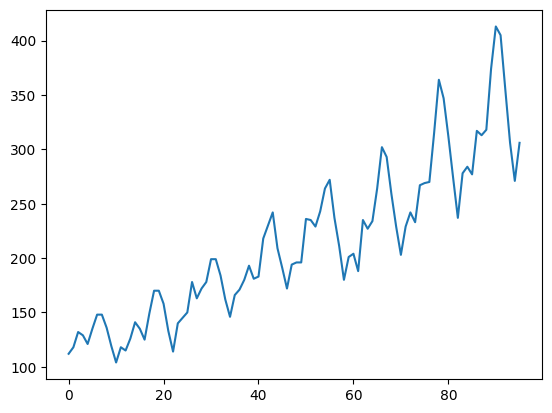

In [54]:
Airline2['Passengers'].plot()

In [75]:
def ad_test(dataset):
  dftest = adfuller(dataset,autolag='AIC')
  print('p-value :', dftest[1])



In [76]:
ad_test(Airline2['Passengers'])
p_values = 0.9968
if p_values<0.05:
  print('Data Is Stationary')
else:
  print('Data Is Non-Stationary ')

p-value : 0.9968250481137263
Data Is Non-Stationary 


Arima Model Building

In [79]:
stepwise_fit = auto_arima(Airline2['Passengers'],trace=True, suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=871.345, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=867.283, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=863.757, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=870.076, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=862.193, Time=1.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=861.773, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=860.702, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=862.251, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=855.919, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=860.821, Time=0.07 sec
 A

In [80]:
model = ARIMA(train['Passengers'],order=(3,2,1))
model = model.fit()

In [81]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   71
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -300.828
Date:                Mon, 10 Jul 2023   AIC                            611.655
Time:                        10:18:00   BIC                            622.826
Sample:                             0   HQIC                           616.087
                                 - 71                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2202      0.152      1.451      0.147      -0.077       0.518
ar.L2         -0.1305      0.145     -0.901      0.368      -0.414       0.153
ar.L3         -0.1211      0.124     -0.979      0.328      -0.364       0.121
ma.L1         -1.0000    193.675     -0.005      0.996    -380.596     378.596
sigma2       336.1328   6.51e+04      0.005      0.996   -1.27e+05    1.28e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 2.87
Prob(Q):                              0.76   Prob(JB):                         0.24
Heteroskedasticity (H):               3.22   Skew:                             0.49
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
pred = model.predict(start = 0, end=24)

In [89]:
from math import sqrt
rmse = sqrt(mean_squared_error(pred, test['Passengers']))
rmse

27.91850405981696

In [90]:
pred

0       0.000000
1     168.006480
2     124.016859
3     143.608559
4     130.328315
5     119.576641
6     144.789371
7     155.920116
8     149.249395
9     134.588683
10    117.731095
11    103.787678
12    125.908405
13    114.167339
14    127.923090
15    145.026043
16    131.479469
17    122.428151
18    158.618204
19    175.667588
20    167.005572
21    154.998046
22    130.157216
23    114.866401
24    152.697350
Name: predicted_mean, dtype: float64

Final Model

In [144]:
model_final = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_new  = pd.Series(model_final.predict(test))
pred_new

0      97.850437
1     100.258428
2     126.333086
3     118.741077
4     117.649068
5     138.057059
6     158.965050
7     160.706375
8     137.114366
9     114.022357
10     92.930348
11    115.831766
12    120.988072
13    123.432866
14    149.544328
15    141.989122
16    140.933917
17    161.378712
18    182.323506
19    184.101634
20    160.546429
21    137.491223
22    116.436018
23    139.374240
24    144.567349
dtype: float64

In [145]:
test.Passengers

0     112
1     118
2     132
3     129
4     121
5     135
6     148
7     148
8     136
9     119
10    104
11    118
12    115
13    126
14    141
15    135
16    125
17    149
18    170
19    170
20    158
21    133
22    114
23    140
24    145
Name: Passengers, dtype: int64

In [146]:
predict_data = pd.DataFrame()
predict_data['Forecasted_Passengers'] = pd.Series(pred_new)
pred_new

0      97.850437
1     100.258428
2     126.333086
3     118.741077
4     117.649068
5     138.057059
6     158.965050
7     160.706375
8     137.114366
9     114.022357
10     92.930348
11    115.831766
12    120.988072
13    123.432866
14    149.544328
15    141.989122
16    140.933917
17    161.378712
18    182.323506
19    184.101634
20    160.546429
21    137.491223
22    116.436018
23    139.374240
24    144.567349
dtype: float64

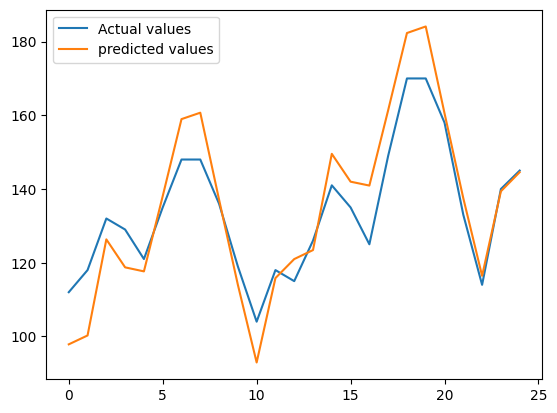

In [161]:
plt.plot(test.Passengers,label='Actual values')
plt.plot(pred_new,label = 'predicted values')
plt.legend()

In [155]:
model_final1 = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Airline2).fit()
pred_new1  = pd.Series(model_final1.predict(Airline2))
pred_new1

0     101.802790
1     100.717631
2     128.632471
3     121.797312
4     120.837153
         ...    
91    371.087153
92    343.797312
93    316.632471
94    292.842631
95    319.427790
Length: 96, dtype: float64

In [156]:
predict_data1 = pd.DataFrame()
predict_data1['Forecasted_Passengers'] = pd.Series(pred_new)
pred_new1

0     101.802790
1     100.717631
2     128.632471
3     121.797312
4     120.837153
         ...    
91    371.087153
92    343.797312
93    316.632471
94    292.842631
95    319.427790
Length: 96, dtype: float64

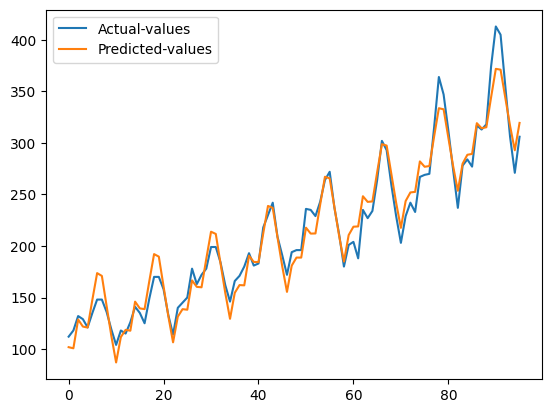

In [160]:
plt.plot(Airline2.Passengers, label='Actual-values')
plt.plot(pred_new1,label='Predicted-values')
plt.legend()